# Random Forest Classification Model - Medical No Shows

### Import Dependencies

In [1]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")

### Load Dataset for modelling

In [2]:
data = pd.read_csv('../data/cleanData/appointment_dataset2.csv')
print(f"Shape of the data is: {data.shape}")
data.head()

Shape of the data is: (110521, 29)


,appointment_id,patient_id,repeat_patient_yn,male_yn,female_yn,same_day_appt_yn,within_week_appt_yn,advanced_appt_yn,monday_yn,tuesday_yn,...,young_adult_yn,adult_yn,senior_yn,welfare_assistance,hypertension,diabetes,alcoholism,handicap_yn,sms_received,no_show_yn
0,5698125,6.788140e+14,1,0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,5698246,5.459370e+13,0,0,1,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
2,5699393,4.369160e+12,1,0,1,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,5694371,5.452340e+13,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,5698279,6.291780e+13,1,0,1,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0


In [3]:
#check for nulls and verify that attributes for modelling are the correct datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110521 entries, 0 to 110520
Data columns (total 29 columns):
appointment_id                   110521 non-null int64
patient_id                       110521 non-null float64
repeat_patient_yn                110521 non-null int64
male_yn                          110521 non-null int64
female_yn                        110521 non-null int64
same_day_appt_yn                 110521 non-null int64
within_week_appt_yn              110521 non-null int64
advanced_appt_yn                 110521 non-null int64
monday_yn                        110521 non-null int64
tuesday_yn                       110521 non-null int64
wednesday_yn                     110521 non-null int64
thursday_yn                      110521 non-null int64
friday_yn                        110521 non-null int64
saturday_yn                      110521 non-null int64
neighborhood_income_lower_yn     110521 non-null int64
neighborhood_income_middle_yn    110521 non-null int64
neigbor

### Drop irrelevent columns

In [4]:
clean_data = data.drop(['appointment_id', 'patient_id'], axis=1)

print(f"Shape of the data is: {clean_data.shape}")

Shape of the data is: (110521, 27)


### Pull our target column from the data and create a list of our outcome values

In [5]:
target = clean_data['no_show_yn']

### Drop the target column from our data 

In [6]:
data = clean_data.drop('no_show_yn', axis=1)
feature_names = data.columns
data.head()

,repeat_patient_yn,male_yn,female_yn,same_day_appt_yn,within_week_appt_yn,advanced_appt_yn,monday_yn,tuesday_yn,wednesday_yn,thursday_yn,...,child_yn,young_adult_yn,adult_yn,senior_yn,welfare_assistance,hypertension,diabetes,alcoholism,handicap_yn,sms_received
0,1,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,1,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,1,0,1,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0,1,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,0,1,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0


### Split the data into training and test sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=3)

### Create a Random Forest Classifier and fit the training data and score with the test data

In [8]:
rf = RandomForestClassifier(n_estimators=50)
rf = rf.fit(X_train, y_train)
print(f"Training Data Score: {rf.score(X_train, y_train)}")
print(f"Testing Data Score: {rf.score(X_test, y_test)}")

Training Data Score: 0.8103148751357221
Testing Data Score: 0.7919004017227027


### Make predictions

In [9]:
predictions = rf.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 0 0 0 0 0 0 0 0 0]
First 10 Actual labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### View predictions along with their probabilities of being within each class

In [10]:
probs = rf.predict_proba(X_test)
pred_df = pd.DataFrame({
    "Prediction": predictions, 
    "Actual": y_test, 
    "P(Show)": [p[0] for p in probs], 
    "P(Noshow)": [p[1] for p in probs]
    }).reset_index(drop=True)

pred_df.head(10)

,Prediction,Actual,P(Show),P(Noshow)
0,0,0,0.517785,0.482215
1,0,0,1.000000,0.000000
2,0,0,0.959949,0.040051
3,0,0,0.946017,0.053983
4,0,0,0.772645,0.227355
5,0,0,0.980991,0.019009
6,0,0,0.724780,0.275220
7,0,0,0.786027,0.213973
8,0,0,1.000000,0.000000
9,0,0,0.717298,0.282702


### Create a Confusion Matrix

In [11]:
confusion_matrix(y_test,predictions)

array([[21513,   534],
       [ 5216,   368]])

### Label the Confusion Matrix

In [12]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(f"True Neg: {tn}   False Pos: {fp}")
print(f"False Neg: {fn}  True Pos: {tp}")

True Neg: 21513   False Pos: 534
False Neg: 5216  True Pos: 368


### Plot Confusion Matrix of test data
Check out matrix of true positives, true negatives, false positives, and false negatives

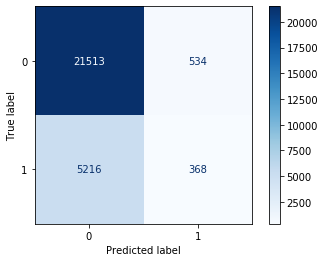

In [13]:
plot_confusion_matrix(rf, X_test, y_test, cmap=plt.cm.Blues, values_format='.5g')

### View features by importance

In [14]:
results = sorted(zip(rf.feature_importances_, feature_names), reverse=True)
results

[(0.20507086874946961, 'same_day_appt_yn'),
 (0.1298438841192259, 'advanced_appt_yn'),
 (0.06770171192897362, 'repeat_patient_yn'),
 (0.06714543142056983, 'sms_received'),
 (0.057117893516594895, 'within_week_appt_yn'),
 (0.041000927120004284, 'welfare_assistance'),
 (0.03960254232174929, 'diabetes'),
 (0.038034357782578285, 'hypertension'),
 (0.03055387686632446, 'handicap_yn'),
 (0.03043643503475341, 'alcoholism'),
 (0.02408070247895387, 'senior_yn'),
 (0.022766412756970587, 'tuesday_yn'),
 (0.02254891172296529, 'wednesday_yn'),
 (0.022338622641080455, 'monday_yn'),
 (0.021868259325558845, 'male_yn'),
 (0.021817720820425233, 'female_yn'),
 (0.02090148997592598, 'day_after_holiday_yn'),
 (0.02069029897455521, 'friday_yn'),
 (0.020315198157934797, 'thursday_yn'),
 (0.01894230953488027, 'neighborhood_income_lower_yn'),
 (0.018825603379797134, 'neigborhood_income_higher_yn'),
 (0.015577374984772574, 'young_adult_yn'),
 (0.015043390797491151, 'neighborhood_income_middle_yn'),
 (0.01403092

In [15]:
RFresults_df = pd.DataFrame(results, columns=['feature_importances','feature_names'])
RFresults_df = RFresults_df.sort_values(by='feature_importances', ascending=False)
RFresults_df

,feature_importances,feature_names
0,0.205071,same_day_appt_yn
1,0.129844,advanced_appt_yn
2,0.067702,repeat_patient_yn
3,0.067145,sms_received
4,0.057118,within_week_appt_yn
5,0.041001,welfare_assistance
6,0.039603,diabetes
7,0.038034,hypertension
8,0.030554,handicap_yn
9,0.030436,alcoholism


### Export model results to csv

In [16]:
RFresults_df.to_csv('../data/cleanData/modelResults/RFresults.csv', index = False, header=True)